## Week 2, Part 1 Assignment:
## CUNY MSDS DATA620 - Web Analytics
---
### Team5: Christopher Estevez, Meaghan Burke, Rickidon Singh,  Ritesh Lohiya, Rose Koh
### 06/18/2018 (due date)
---
## Graph Visualization

In [2]:
import pandas as pd
import networkx as nx
import pylab as plt

## Google+ Social Circle Data

*source: https://snap.stanford.edu/data/egonets-Gplus.html*

### Descriptions of the files included gplus dataset

**nodeId.edges:** The edges in the ego network for the node 'nodeId'. Edges are undirected for facebook, and directed (a follows b) for twitter and gplus. The 'ego' node does not appear, but it is assumed that they follow every node id that appears in this file.

**nodeId.circles:** The set of circles for the ego node. Each line contains one circle, consisting of a series of node ids. The first entry in each line is the name of the circle.

**nodeId.feat:** The features for each of the nodes that appears in the edge file.

**nodeId.egofeat:** The features for the ego user.

**nodeId.featnames:** The names of each of the feature dimensions. Features are '1' if the user has this property in their profile, and '0' otherwise. This file has been anonymized for facebook users, since the names of the features would reveal private data.

### Read in the gplus data 
-  The raw data file contains the unique combination of node connections for the above files. Source file: **gplus_combined.txt.gz**.*Edges from all egonets combined*
-  The code below extracts the gzip file and converts it to a pandas data frame.



In [3]:
initial_df = pd.read_table(r'C:\Users\burke\OneDrive\Desktop\Data 620\gplus_combined.csv', sep=' ',header = None, error_bad_lines=False).drop_duplicates()
initial_df.rename(columns = {0 : 'Nodes_1', 1 : 'Nodes_2'}, inplace = True)
initial_df['Edges'] = range(1, len(initial_df) +1)
initial_df['Edges']= initial_df['Edges'].astype(str)

### Data Summary

In [4]:
initial_df.describe()

,Nodes_1,Nodes_2,Edges
count,13673453,13673453,13673453
unique,72271,107596,13673453
top,106228758905254036967,111091089527727420853,10995085
freq,5056,17055,1


### Filter for a Subset of Nodes:

-  Since the data is too large, the group decided to take a subset for the network analysis
-  Filtered the initial_df for the first 10 nodes under 'Nodes_1'

In [5]:
filter_node = pd.DataFrame(initial_df['Nodes_1'].unique()).head(10)
subset = initial_df.loc[initial_df['Nodes_1'].isin(filter_node[0])]
subset.describe()

,Nodes_1,Nodes_2,Edges
count,7412,7412,7412
unique,10,4302,7412
top,116407635616074189669,116805285176805120365,398013
freq,1688,9,1


### Load the Data Into A Network Object:


- Object G will contain the subset network loaded from the .gz file
- Printing the network information reveals the nodes, edges, and degrees


In [6]:
G = nx.from_pandas_dataframe(subset , 'Nodes_1','Nodes_2', edge_attr = 'Edges')

In [7]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 4302
Number of edges: 7403
Average degree:   3.4417


---

### Visualize The Network:

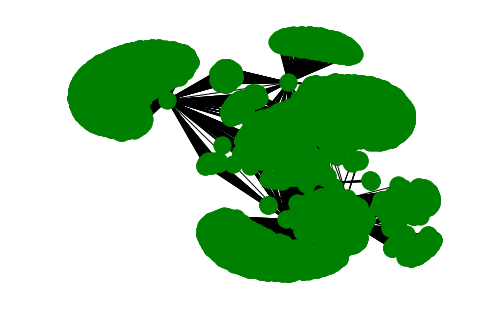

In [8]:
%matplotlib inline
nx.draw(G, node_color = 'green') 
plt.show()

### Subset The Network:

**Two Subsets:**

1) After visualizing the network, a subset of the data is taken by first finding the neighbors from node '108683283643126638695' and using the subgraph function from networkx

2) Create small subgraph (first 150 nodes) just for graphing demo

In [9]:
nodes = G.neighbors('108683283643126638695')
sub_network = G.subgraph(nodes)
print(nx.info(sub_network))

Name: 
Type: SubGraph
Number of nodes: 281
Number of edges: 774
Average degree:   5.5089


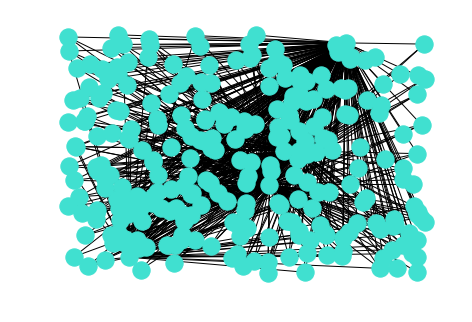

In [10]:
nx.draw_random(sub_network, node_color ='turquoise')

In [11]:
#Create small subgraph (first 150 nodes) just for graphing demo
sub_network_2 =G.subgraph(subset['Nodes_2'].unique().tolist()[:150])
print(nx.info(sub_network_2))

Name: 
Type: SubGraph
Number of nodes: 150
Number of edges: 54
Average degree:   0.7200


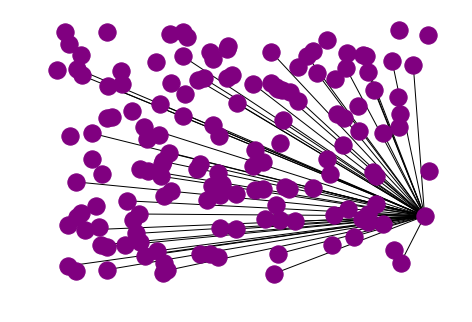

In [12]:
nx.draw_random(sub_network_2, node_color ='purple')

### Measures:

The measures chosen for this assignment are a diameter, Degree Centrality, Between Centrality, and cliques within this subnetwork.

#### Diameter
- The first measure is Diameter and is defined as the maximum eccentricity of any node in the graph, or greatest distance between any pair of nodes in the graph. The network G has a diameter of 5.

In [13]:
nx.diameter(G)

5

#### Degree:
- The node degree is the number of edges adjacent to that node

In [14]:
degree_values =[]
for d in G.degree():
    degree_values.append(d)
degree_centrality =pd.DataFrame(degree_values)
degree_centrality.rename(columns ={0:'Nodes', 1: 'Connection_Num'}, inplace = True)

In [15]:
degree_centrality.sort_values(['Connection_Num'], ascending= False).head(10)

,Nodes,Connection_Num
545,116407635616074189669,1688
690,116374117927631468606,1472
3450,105706178492556563330,1259
3680,112188647432305746617,616
2348,108736646334864181044,562
3032,107527001343993112621,548
1640,117421021456205115327,463
159,116719211656774388392,395
4207,108683283643126638695,281
4082,105513412023818293063,138


#### Degree Centrality:
- the fraction of nodes a node v is connected to

In [16]:
degree_centrality = nx.degree_centrality(G)
print("Degree_Centrality, Node")
sorted( ((v,k) for k,v in degree_centrality.iteritems()), reverse=False)

Degree_Centrality, Node


[(0.00023250406882120437, '100000763912458474062'),
 (0.00023250406882120437, '100003761748305295041'),
 (0.00023250406882120437, '100021025784352405813'),
 (0.00023250406882120437, '100025536618853941891'),
 (0.00023250406882120437, '100029615420017681117'),
 (0.00023250406882120437, '100031852932201570050'),
 (0.00023250406882120437, '100041310890249910592'),
 (0.00023250406882120437, '100042105400303837110'),
 (0.00023250406882120437, '100043057758270223301'),
 (0.00023250406882120437, '100048100630151349283'),
 (0.00023250406882120437, '100057069861700562165'),
 (0.00023250406882120437, '100057204553955934520'),
 (0.00023250406882120437, '100062540864597103249'),
 (0.00023250406882120437, '100063318895469818177'),
 (0.00023250406882120437, '100070927167992422053'),
 (0.00023250406882120437, '100075356758919993129'),
 (0.00023250406882120437, '100080124053175377628'),
 (0.00023250406882120437, '100080670028138179312'),
 (0.00023250406882120437, '100081010984768669358'),
 (0.00023250

#### Between Centrality:
-  Between Centrality measures the extent to which a node lies on paths between other nodes. In other words which are the controllers of information in the network.

In [17]:
between_centrality = nx.betweenness_centrality(G)
print("BTW_Centrality, Node")
sorted( ((v,k) for k,v in between_centrality.iteritems()), reverse=True)

BTW_Centrality, Node


[(0.49447730154809544, '116407635616074189669'),
 (0.45427748054167477, '116374117927631468606'),
 (0.4092560038288479, '105706178492556563330'),
 (0.118120281544385, '117421021456205115327'),
 (0.05222537261589945, '107527001343993112621'),
 (0.03605826256588463, '112188647432305746617'),
 (0.02903956535988064, '108736646334864181044'),
 (0.023797011456284236, '116719211656774388392'),
 (0.006901338528915937, '113186623583029971455'),
 (0.005270068767137371, '116805285176805120365'),
 (0.005167862384360245, '116113014152499702246'),
 (0.005075906290791452, '105513412023818293063'),
 (0.004600963474752074, '106734796011714755852'),
 (0.004317650667796659, '108683283643126638695'),
 (0.003788475399818808, '107117483540235115863'),
 (0.003788475399818808, '106189723444098348646'),
 (0.0034097282713912874, '109590423597896078382'),
 (0.0030278160736043626, '106526452034734966566'),
 (0.0029620712986995787, '107375322906605680039'),
 (0.002580159100912845, '116807883656585676940'),
 (0.002

#### Cliques:

- Groups of nodes with shared interest

In [18]:
list(nx.find_cliques(G))

[['114096999830773780731', '107527001343993112621'],
 ['117500003827318237082', '117421021456205115327'],
 ['107066609145001672622', '105706178492556563330'],
 ['111065108889012087599', '105706178492556563330'],
 ['109919679182093139567', '116374117927631468606'],
 ['114113584202208995405', '116374117927631468606'],
 ['103606055935987830663', '116374117927631468606'],
 ['105757929388673748603', '116374117927631468606'],
 ['103436303979291154941', '116374117927631468606'],
 ['108979351423521937766', '116374117927631468606'],
 ['106154669044284257296', '116374117927631468606'],
 ['114431900614226435491', '105706178492556563330'],
 ['101681655028573880244', '116374117927631468606'],
 ['110667512688392218888', '116374117927631468606'],
 ['102762278318790381974', '105706178492556563330'],
 ['105380757076586578977', '105706178492556563330'],
 ['105888615414982242080', '116719211656774388392'],
 ['107164208673760588451', '116374117927631468606'],
 ['104135390008942230902', '105706178492556563